<h1><b>Importing requirements</b></h1>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from scipy import stats


<h1><b>Data Loading</b></h1>

In [2]:
df = pd.read_csv("index_1.csv") # read_csv reads csv files.

print("\n First 5 rows:")
print("\n")
print(df.head()) # Shows the first 5 data of the data set
print("\n How much rows and columns:")
print(df.shape) # Shows how many rows and columns our dataset has
print("\n DataFrame Info:")
print(df.info()) # Checking column names and data types


 First 5 rows:


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

 How much rows and columns:
(3636, 6)

 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card     

In [3]:
df.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [4]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano


<h1><b>Data Cleaning</b></h1>

<b>Missing Values</b>

In [5]:
# Check for missing values in each DataFrame
print("\n Handling Missing Values of our Dataframe")
print(df.isnull().sum())
# And we see that card column 89 has empty data and the rest of the columns have no empty data.


 Handling Missing Values of our Dataframe
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [6]:
# First fill forward (ffill), then fill backwards (bfill) the rest:
df['card'] = df['card'].ffill().bfill()


In [7]:
print(df.isnull().sum()) # After completing the filling process, we checked it again.

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64


<b>Outliers</b>

In [8]:
# Check for outliers in the 'Sales' column.
# Lower and upper limits are determined with the IQR method, and those outside these limits are considered outliers.

Q1 = df['money'].quantile(0.25)
Q3 = df['money'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"lower bound: {lower_bound}")
print(f"upper bound: {upper_bound}")

# We filter and display outliers
outliers = df[(df['money'] < lower_bound) | (df['money'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
display(outliers)

Q1: 27.92
Q3: 35.76
IQR: 7.839999999999996
lower bound: 16.160000000000007
upper bound: 47.519999999999996
Number of outliers: 0


,date,datetime,cash_type,card,money,coffee_name


In [9]:
# We check if there is more than one of the same data in the data set.

duplicates = df[df.duplicated()]

print(f"Repeated coloumn value: {duplicates.shape[0]}")

# Since none there is no need to drop duplicates
# df = df.drop_duplicates()

Repeated coloumn value: 0


In [10]:
df.shape # Number of rows and columns after removing duplicate values


(3636, 6)

<h1><b>Feature Engineering</b></h1>

In [11]:
# Convert column 'datetime' to datetime format

df["datetime"] = pd.to_datetime(df["datetime"], errors='coerce')

# Get time information from datetime in 'time' column
df["time"] = df["datetime"].dt.time

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# 'month' column: Month information from 'date' column
df["month"] = df["date"].dt.to_period("M")

# 'week' column: week information from 'date' column
df["week"] = df["date"].dt.to_period("W")

# 'year' column: year information from 'date' column

df["year"] = df["date"].dt.to_period("Y")

# Set column 'datetime' as index

df.set_index('datetime', inplace=True)

# Make sure data is in order

df.sort_index(inplace=True)



In [12]:
# Extracting day of week and weekend information from 'Date' column.

# Creating Day_of_Week coloumn to display the Day name of the given time based on date coloumn
df['Day_of_Week'] = df['date'].dt.day_name()

# Creating Is_Weekend coloumn to display if the 
df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 'Yes' if x in ['Saturday', 'Sunday'] else 'No')

# Show first 1000 rows
df[['date', 'Day_of_Week', 'Is_Weekend']].head(1000)


,date,Day_of_Week,Is_Weekend
datetime,,,
2024-03-01 10:15:50.520,2024-03-01,Friday,No
2024-03-01 12:19:22.539,2024-03-01,Friday,No
2024-03-01 12:20:18.089,2024-03-01,Friday,No
2024-03-01 13:46:33.006,2024-03-01,Friday,No
2024-03-01 13:48:14.626,2024-03-01,Friday,No
...,...,...,...
2024-07-20 08:05:44.469,2024-07-20,Saturday,Yes
2024-07-20 08:06:48.685,2024-07-20,Saturday,Yes
2024-07-20 08:07:51.433,2024-07-20,Saturday,Yes


In [13]:
df.columns # displays the coloumns

Index(['date', 'cash_type', 'card', 'money', 'coffee_name', 'time', 'month',
       'week', 'year', 'Day_of_Week', 'Is_Weekend'],
      dtype='object')

In [14]:
# Calculate Daily, Weekly and Monthly total 'money'
df_money_daily = df.resample('D')['money'].sum()
df_money_weekly = df.resample('W')['money'].sum()
df_money_monthly = df.resample('M')['money'].sum()

print(df_money_daily.head())  # Show first 5 rows
print("\n")
print(df_money_weekly.head())  # Show first 5 rows
print("\n")
print(df_money_monthly.head())  # Show first 5 rows

datetime
2024-03-01    396.3
2024-03-02    228.1
2024-03-03    349.1
2024-03-04    135.2
2024-03-05    338.5
Freq: D, Name: money, dtype: float64


datetime
2024-03-03     973.5
2024-03-10    1840.5
2024-03-17    1516.3
2024-03-24    1307.8
2024-03-31    1412.1
Freq: W-SUN, Name: money, dtype: float64


datetime
2024-03-31    7050.20
2024-04-30    6720.56
2024-05-31    9063.42
2024-06-30    7758.76
2024-07-31    6915.94
Freq: ME, Name: money, dtype: float64


C:\Users\BERKAY\AppData\Local\Temp\ipykernel_13372\2562781426.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_money_monthly = df.resample('M')['money'].sum()


In [15]:
# We have looked at how payments are shown by card or cash.
df[df["cash_type"] == "card"]["money"].sum(), df[df["cash_type"] == "cash"]["money"].sum()

(112245.57999999999, 3186.0)

In [16]:
df.head()


,date,cash_type,card,money,coffee_name,time,month,week,year,Day_of_Week,Is_Weekend
datetime,,,,,,,,,,,
2024-03-01 10:15:50.520,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520000,2024-03,2024-02-26/2024-03-03,2024,Friday,No
2024-03-01 12:19:22.539,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539000,2024-03,2024-02-26/2024-03-03,2024,Friday,No
2024-03-01 12:20:18.089,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089000,2024-03,2024-02-26/2024-03-03,2024,Friday,No
2024-03-01 13:46:33.006,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006000,2024-03,2024-02-26/2024-03-03,2024,Friday,No
2024-03-01 13:48:14.626,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626000,2024-03,2024-02-26/2024-03-03,2024,Friday,No


<h1><b>Data Splitting</b></h1>

In [17]:
df.describe()

,date,money
count,3636,3636.000000
mean,2024-09-30 11:56:02.376237568,31.746859
min,2024-03-01 00:00:00,18.120000
25%,2024-07-03 00:00:00,27.920000
50%,2024-10-06 12:00:00,32.820000
75%,2025-01-08 00:00:00,35.760000
max,2025-03-23 00:00:00,40.000000
std,NaN,4.919926


In [18]:

# We Set datetimeindex

df = df.sort_index()  # Ensure time order

# # Select target variable
y = df['money']

# # Determine input variables (all columns except target)
x = df.drop(columns=['money'])

# # Time series is properly split (shuffle off!)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

print("Train starts:", x_train.index[0], "→ Ends:", x_train.index[-1])
print("Test starts:", x_test.index[0], "→ Ends:", x_test.index[-1])



Train starts: 2024-03-01 10:15:50.520000 → Ends: 2025-02-02 12:54:32.175000
Test starts: 2025-02-02 12:56:04.653000 → Ends: 2025-03-23 18:11:38.635000


In [19]:
print(x_train.head())

                              date cash_type                 card  \
datetime                                                            
2024-03-01 10:15:50.520 2024-03-01      card  ANON-0000-0000-0001   
2024-03-01 12:19:22.539 2024-03-01      card  ANON-0000-0000-0002   
2024-03-01 12:20:18.089 2024-03-01      card  ANON-0000-0000-0002   
2024-03-01 13:46:33.006 2024-03-01      card  ANON-0000-0000-0003   
2024-03-01 13:48:14.626 2024-03-01      card  ANON-0000-0000-0004   

                           coffee_name             time    month  \
datetime                                                           
2024-03-01 10:15:50.520          Latte  10:15:50.520000  2024-03   
2024-03-01 12:19:22.539  Hot Chocolate  12:19:22.539000  2024-03   
2024-03-01 12:20:18.089  Hot Chocolate  12:20:18.089000  2024-03   
2024-03-01 13:46:33.006      Americano  13:46:33.006000  2024-03   
2024-03-01 13:48:14.626          Latte  13:48:14.626000  2024-03   

                                       

In [20]:
print(x_test)

                              date cash_type                 card  \
datetime                                                            
2025-02-02 12:56:04.653 2025-02-02      card  ANON-0000-0000-1151   
2025-02-02 14:22:57.323 2025-02-02      card  ANON-0000-0000-0265   
2025-02-02 16:45:07.918 2025-02-02      card  ANON-0000-0000-0507   
2025-02-02 16:46:57.223 2025-02-02      card  ANON-0000-0000-1152   
2025-02-03 07:03:24.790 2025-02-03      card  ANON-0000-0000-1152   
...                            ...       ...                  ...   
2025-03-23 10:34:54.894 2025-03-23      card  ANON-0000-0000-1158   
2025-03-23 14:43:37.362 2025-03-23      card  ANON-0000-0000-1315   
2025-03-23 14:44:16.864 2025-03-23      card  ANON-0000-0000-1315   
2025-03-23 15:47:28.723 2025-03-23      card  ANON-0000-0000-1316   
2025-03-23 18:11:38.635 2025-03-23      card  ANON-0000-0000-1275   

                                 coffee_name             time    month  \
datetime                    

In [21]:
print(y_test)

datetime
2025-02-02 12:56:04.653    35.76
2025-02-02 14:22:57.323    30.86
2025-02-02 16:45:07.918    35.76
2025-02-02 16:46:57.223    35.76
2025-02-03 07:03:24.790    35.76
                           ...  
2025-03-23 10:34:54.894    35.76
2025-03-23 14:43:37.362    35.76
2025-03-23 14:44:16.864    35.76
2025-03-23 15:47:28.723    25.96
2025-03-23 18:11:38.635    35.76
Name: money, Length: 728, dtype: float64


<h1><b>Chapter 3: Exploratory Data Analysis (EDA)</b></h1>

<h2>3.1 Descriptive Statistics</h2>

In [22]:
#Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

#Mean Values
print(f"\n\nMoney Mean Value: {df["money"].mean()}")
#Median Values
print(f"Money Median Value: {df["money"].median()}")
#Skewness Values
print(f"Money Skewness Value: {df["money"].skew()}")
#Variance values
print(f"Money Variance Value: {df["money"].var()}")


Summary Statistics:
                                date        money
count                           3636  3636.000000
mean   2024-09-30 11:56:02.376237568    31.746859
min              2024-03-01 00:00:00    18.120000
25%              2024-07-03 00:00:00    27.920000
50%              2024-10-06 12:00:00    32.820000
75%              2025-01-08 00:00:00    35.760000
max              2025-03-23 00:00:00    40.000000
std                              NaN     4.919926


Money Mean Value: 31.74685918591859
Money Median Value: 32.82
Money Skewness Value: -0.523253548313041
Money Variance Value: 24.205669912489583


<h2>Time Series Decomposition</h2>

In [23]:
df_money_daily = df_money_daily.to_frame(name='money') if isinstance(df_money_daily, pd.Series) else df_money_daily

df_money_daily['day_of_week'] = df_money_daily.index.dayofweek
df_money_daily['is_weekend'] = df_money_daily['day_of_week'].isin([5, 6]).astype(int)  # 5 and 6 represent Saturday and Sunday

decomposition = seasonal_decompose(df_money_daily['money'], model='additive', period=7)  #7 days for weekly seasonality

<h3>Statistics</h3>

In [24]:

print("Daily Sales Statistics:")
print(df_money_daily['money'].describe())

Daily Sales Statistics:
count    388.000000
mean     297.504072
std      163.430676
min        0.000000
25%      184.550000
50%      272.840000
75%      385.840000
max      836.660000
Name: money, dtype: float64


In [25]:
print("\nTrend Statistics:")
print(decomposition.trend.describe())


Trend Statistics:
count    382.000000
mean     296.432932
std      104.137875
min       90.060000
25%      212.732143
50%      278.927143
75%      374.877857
max      535.760000
Name: trend, dtype: float64


In [26]:
print("\nSeasonality Statistics:")
print(decomposition.seasonal.describe())


Seasonality Statistics:
count    388.000000
mean      -0.176760
std       28.760108
min      -49.803999
25%      -24.812042
50%        2.438996
75%       29.367256
max       41.693126
Name: seasonal, dtype: float64


In [27]:
print("\nResidual Statistics:")
print(decomposition.resid.describe())


Residual Statistics:
count    382.000000
mean      -0.143620
std      122.676801
min     -311.505101
25%      -88.904716
50%       -9.471178
75%       79.477731
max      379.141159
Name: resid, dtype: float64


<h2>Visualizing</h2>
<h3>Plotting the components</h3>

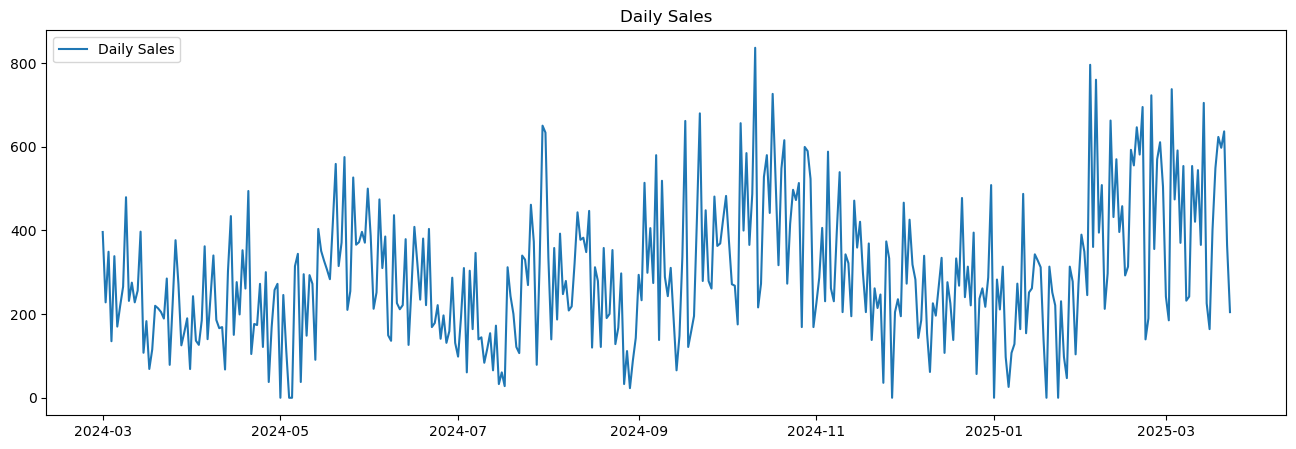

In [28]:
#Daily
plt.figure(figsize=(16, 5))
plt.plot(df_money_daily['money'], label='Daily Sales')
plt.legend(loc='upper left')
plt.title('Daily Sales')
plt.show()


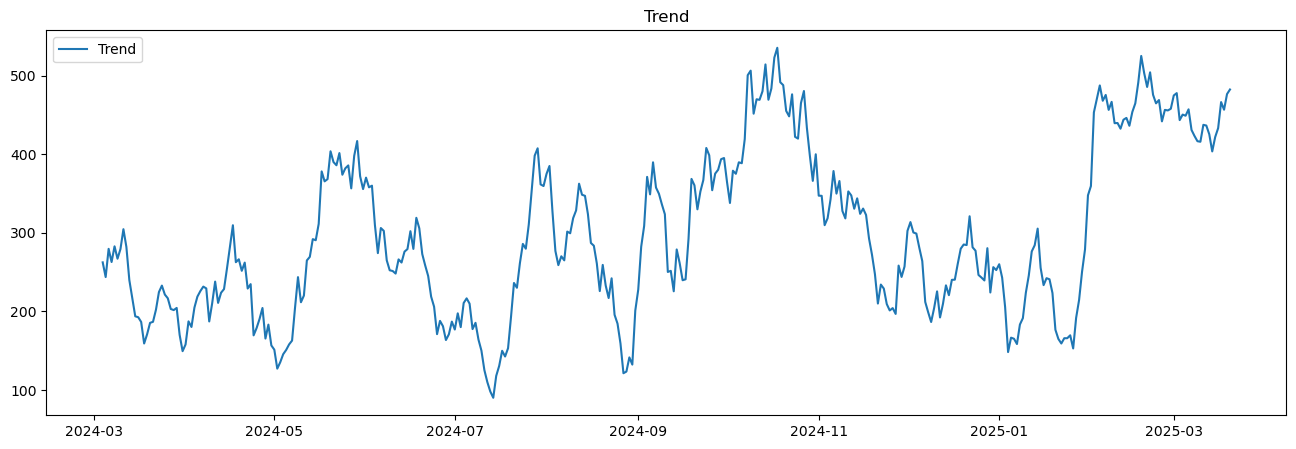

In [29]:
#Trend
plt.figure(figsize=(16, 5))
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')
plt.show()

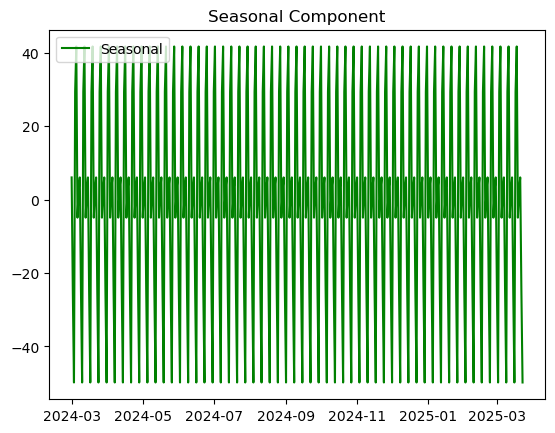

In [30]:
#Seasonal
#plt.figure(figsize=(16, 5))
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.show()

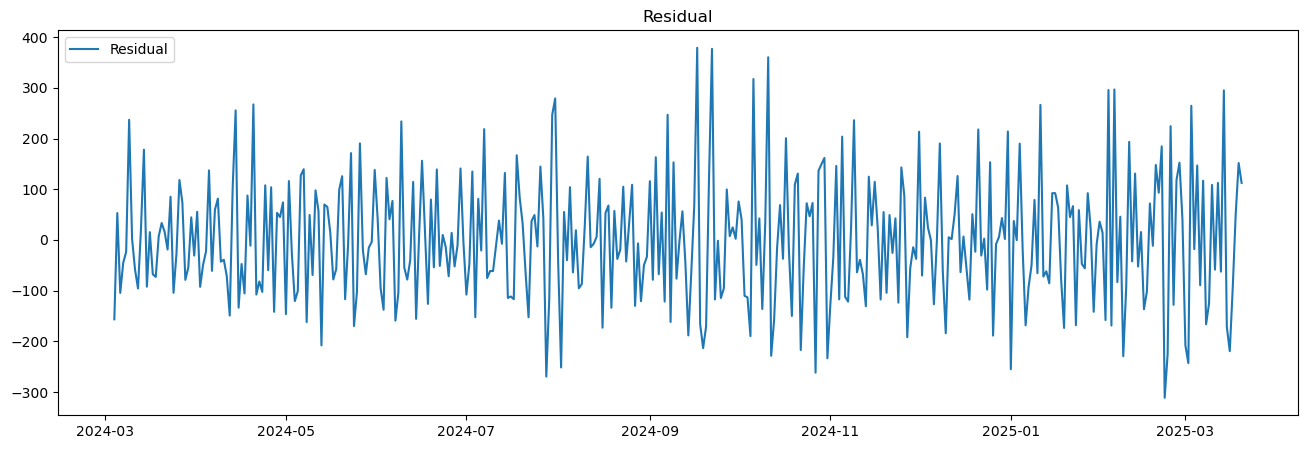

In [31]:
# Residual
plt.figure(figsize=(16, 5))
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')
plt.show()


<h3>Statistics</h3>

<h3>Monthly Sales Histogram</h3>

In [32]:
df_money_monthly.index = pd.to_datetime(df_money_monthly.index)

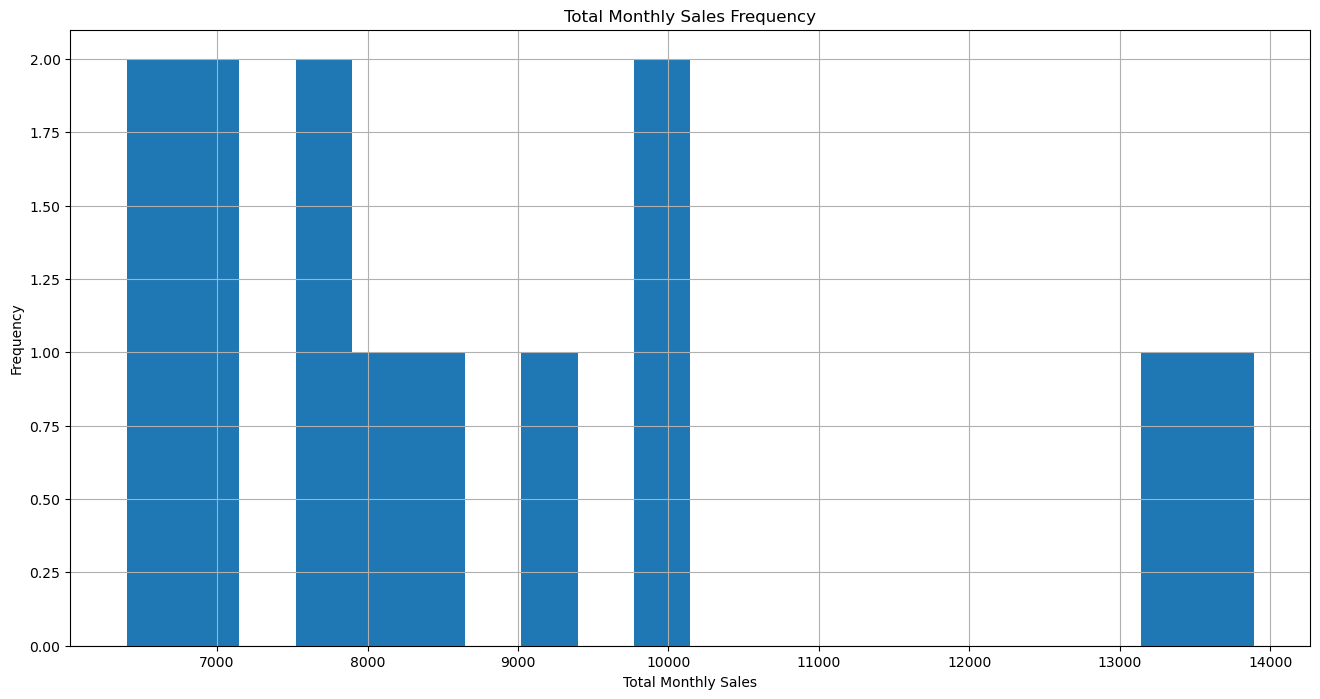

In [33]:
# A histogram of the Monthly Sales frequency(how many times each month's sales occurred)
plt.figure(figsize=(16, 8))
df_money_monthly.hist(bins=20)
plt.title('Total Monthly Sales Frequency')
plt.xlabel('Total Monthly Sales')
plt.ylabel('Frequency')
plt.show()


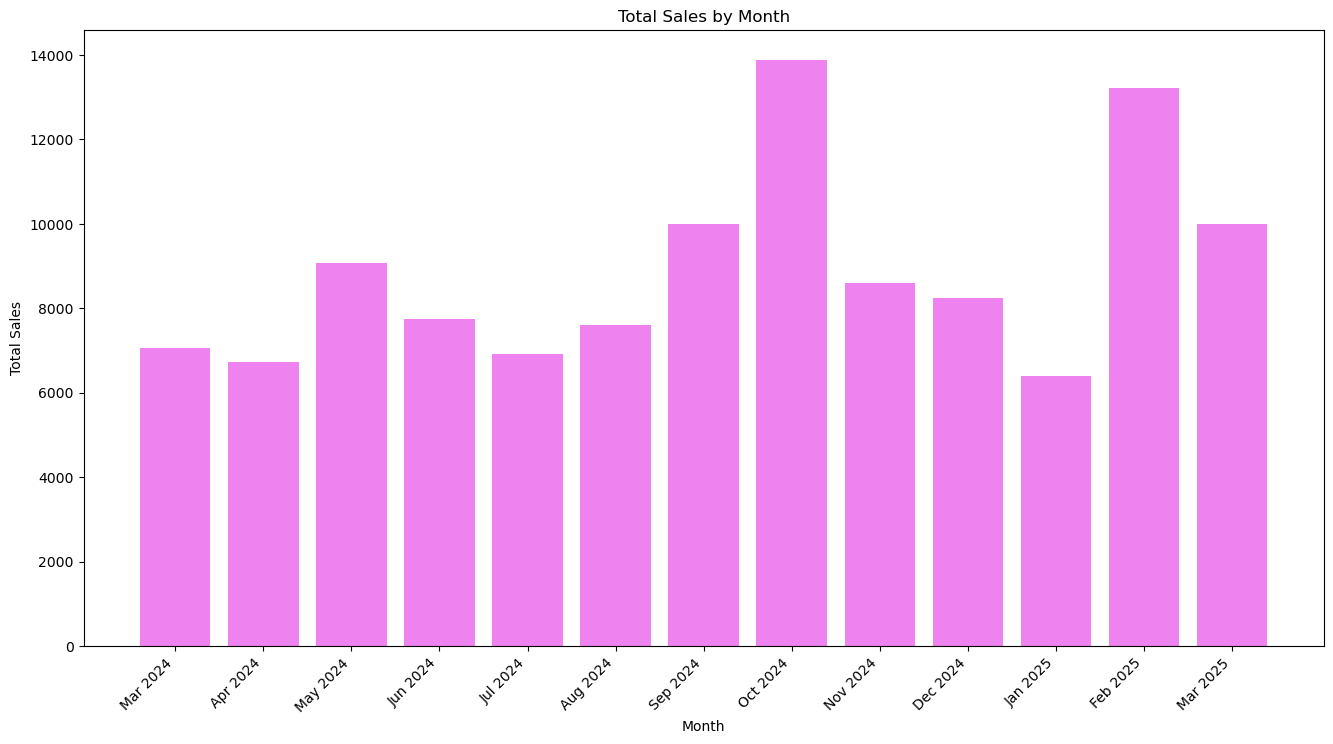

In [34]:
#Monthly sales over time
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(range(len(df_money_monthly)), df_money_monthly.values, color='violet')

ax.set_xticks(range(len(df_money_monthly)))
ax.set_xticklabels([d.strftime('%b %Y') for d in df_money_monthly.index], rotation=45, ha='right')

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


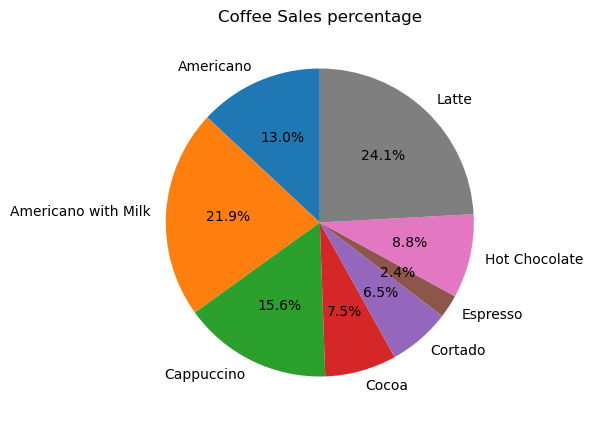

In [35]:
#Coffee sales
coffee_sales = df.groupby('coffee_name')['money'].sum()

plt.figure(figsize=(5, 5))
plt.pie(coffee_sales, labels=coffee_sales.index, autopct='%1.1f%%', startangle=90)

plt.title('Coffee Sales percentage')
plt.show()

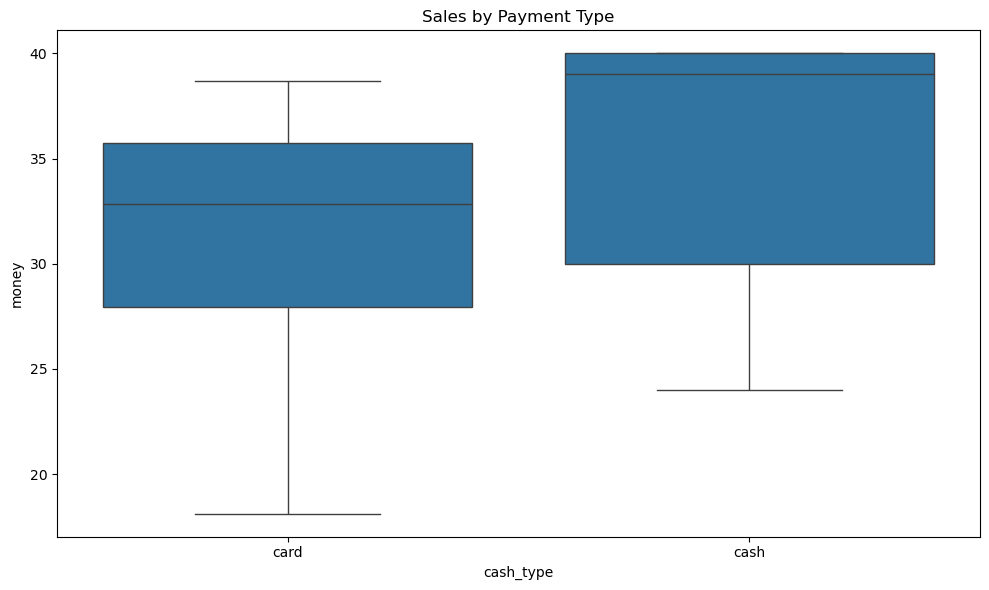

In [36]:
# Sales distribution by cash type
plt.figure(figsize=(10, 6))
sns.boxplot(x='cash_type', y='money', data=df)
plt.title('Sales by Payment Type')
plt.tight_layout()
plt.show()

<h3>Daily Sales</h3>

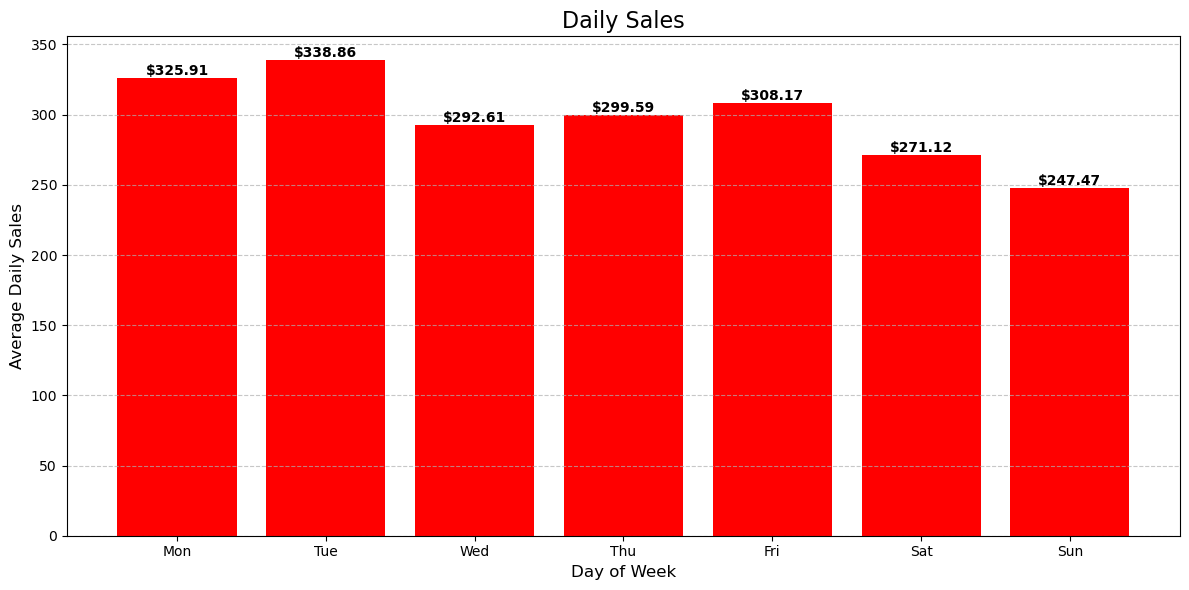

In [37]:

# Average sales for each day
daily_avg = df_money_daily.groupby(df_money_daily.index.dayofweek)['money'].mean()

# bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(7), daily_avg.values, color='red')
plt.title('Daily Sales', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Daily Sales', fontsize=12)
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

<h3>Correlation Heatmap</h3>

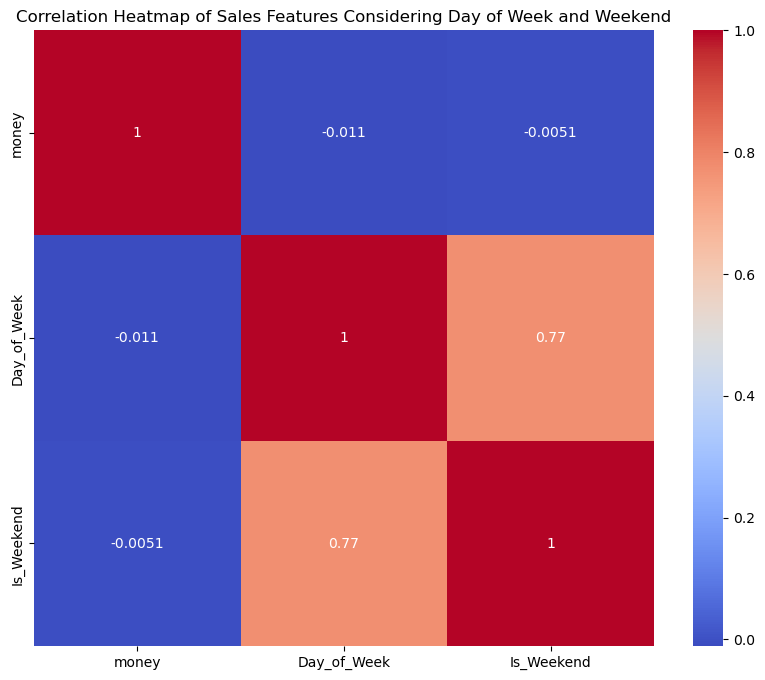

In [38]:
#Considering our numerical columns and features are limited to 'Day_of_Week', 'Is_Weekend', and 'Money',
#we made a correlation heatmap to understand the relationship between these features.
columns_for_correlation = ['money', 'Day_of_Week', 'Is_Weekend']


df_corr = df[columns_for_correlation].copy()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_corr['Day_of_Week'] = pd.Categorical(df_corr['Day_of_Week'], categories=day_order, ordered=True).codes
df_corr['Is_Weekend'] = (df_corr['Is_Weekend'] == 'Yes').astype(int)

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Sales Features Considering Day of Week and Weekend')
plt.show()


<h1><b>Chapter 4: Modeling</b></h1>

<h2>4.1 Model 1: ARIMA</h2>


In [39]:
#check stationarity on training data
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_money_daily['money'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -3.0496778109849787
p-value: 0.030508413587781762


In [40]:
# Train-Test Split
train_size = int(len(df_money_daily['money']) * 0.8)
train = df_money_daily[:train_size]
test = df_money_daily[train_size:]


In [41]:
#Fine tuning to find the best p and q
import itertools
from statsmodels.tsa.arima.model import ARIMA

In [42]:
# Define range of p, d, q
p =  q = range(0, 4)
d = 0
# Generate all combinations
pdq = list(itertools.product(p,[d], q))

# To store results
aic_results = []
y = train['money']
# Loop over all combinations
for param in pdq:
    try:
        model = ARIMA(y, order=param)
        model_fit = model.fit()
        aic_results.append((param, model_fit.aic))
    except:
        continue  # Skip if model fails

c:\Users\BERKAY\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\BERKAY\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\BERKAY\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\BERKAY\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive para

In [43]:
# Sort results by AIC
sorted_results = sorted(aic_results, key=lambda x: x[1])

# Best model
best_order, best_aic = sorted_results[0]
print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

Best ARIMA order: (3, 0, 3) with AIC: 3917.930236141092


In [44]:
# Fit the best model
best_model = ARIMA(y, order=best_order)
best_fit = best_model.fit()

# Summary
print(best_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  money   No. Observations:                  310
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1950.965
Date:                Tue, 22 Jul 2025   AIC                           3917.930
Time:                        16:56:22   BIC                           3947.823
Sample:                    03-01-2024   HQIC                          3929.880
                         - 01-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.4377     30.018      9.309      0.000     220.604     338.271
ar.L1          2.3104      0.046     49.721      0.000       2.219       2.401
ar.L2         -2.1847      0.076    -28.755      0.0

c:\Users\BERKAY\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
forecast_steps = len(test['money'])
forecasting = model_fit.forecast(steps=forecast_steps)

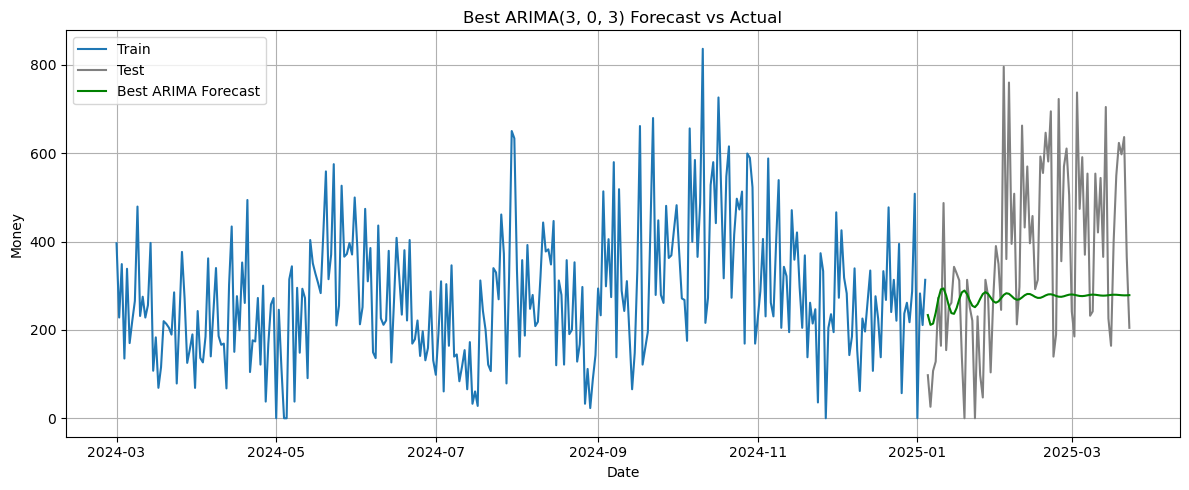

In [46]:
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['money'], label='Train')
plt.plot(test.index, test['money'], label='Test', color='gray')
plt.plot(forecasting, label='Best ARIMA Forecast', color='green')
plt.legend()
plt.title(f"Best ARIMA{best_order} Forecast vs Actual")
plt.ylabel("Money")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
#let's forecast for 2025 using the all the data without splitting
full_model = ARIMA(df_money_daily['money'], order = best_order)
full_model_fit = full_model.fit()

c:\Users\BERKAY\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\BERKAY\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\BERKAY\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
fure_forecast = full_model_fit.forecast(steps = 283)
print(fure_forecast)

2025-03-24    371.228115
2025-03-25    403.145354
2025-03-26    417.299278
2025-03-27    356.492047
2025-03-28    418.266816
                 ...    
2025-12-27    297.518332
2025-12-28    297.518148
2025-12-29    297.518039
2025-12-30    297.517879
2025-12-31    297.517740
Freq: D, Name: predicted_mean, Length: 283, dtype: float64


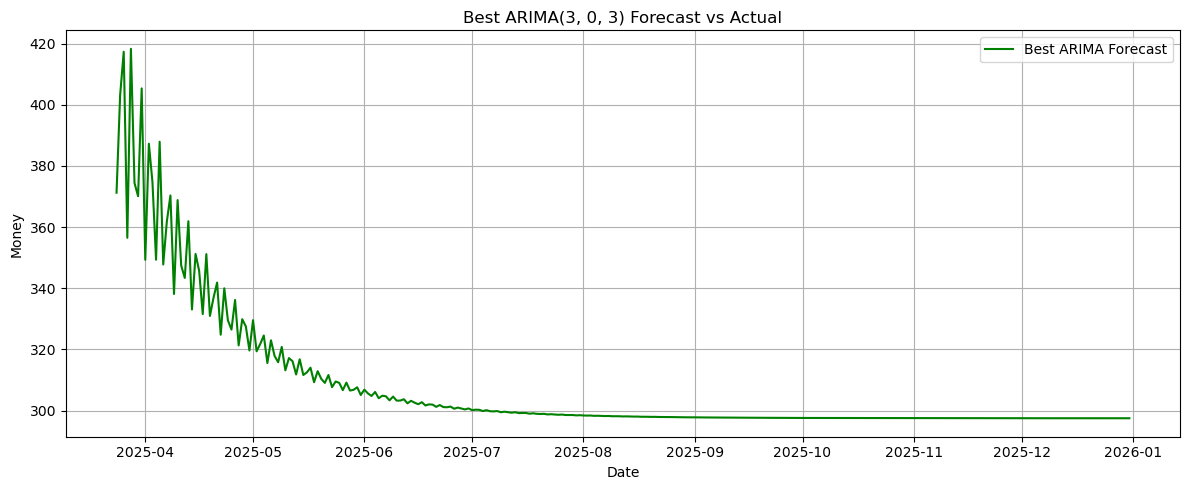

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(fure_forecast, label='Best ARIMA Forecast', color='green')
plt.legend()
plt.title(f"Best ARIMA{best_order} Forecast vs Actual")
plt.ylabel("Money")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>4.2 Model 2: Regression-Based</h2>

In [50]:
#Convert date to numeric value (for regression)
# 1. Create a numeric representation of date for regression
df['Date_Ordinal'] = df['date'].map(pd.Timestamp.toordinal)


# 4. Define predictors and target
X = df[['Date_Ordinal']]
y = df['money']

<h2>Linear Regression</h2>

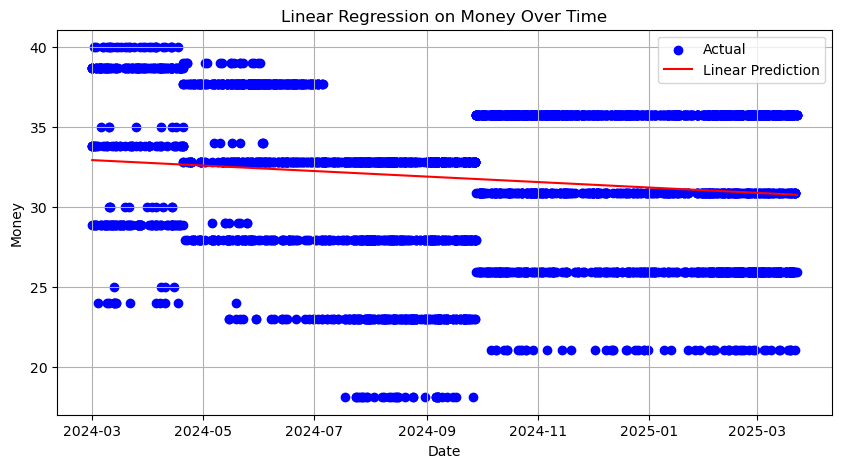

In [51]:
from sklearn.linear_model import LinearRegression

#making the model
linear_model = LinearRegression()
linear_model.fit(X, y)

#predection
df['Pred_Linean'] = linear_model.predict(X)

plt.figure(figsize=(10, 5))

# Scatter for actual data
plt.scatter(df['date'], y, color='blue', label='Actual')

# Line for predicted values
plt.plot(df['date'], df['Pred_Linean'], color='red', label='Linear Prediction')

plt.legend()
plt.title("Linear Regression on Money Over Time")
plt.xlabel("Date")
plt.ylabel("Money")
plt.grid(True)
plt.show()

<h2>Polynomial Regression</h2>

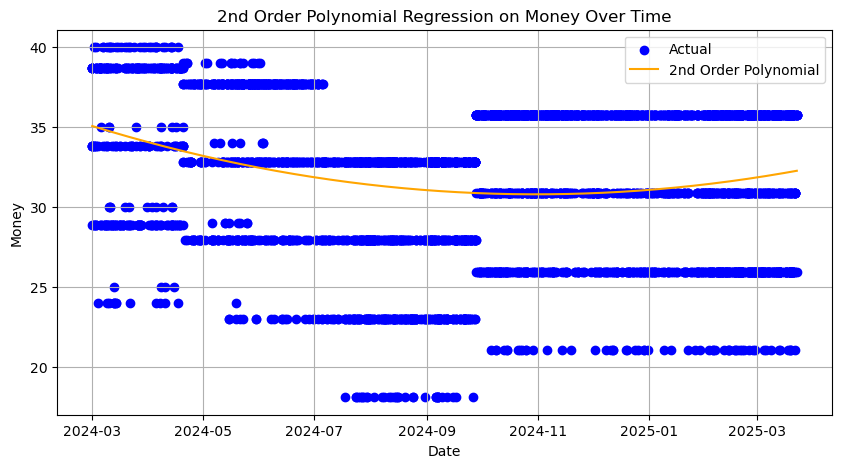

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Degree 2 for quadratic model
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

# Add prediction to DataFrame
df['Pred_Poly_2'] = poly_model.predict(X)

plt.figure(figsize=(10, 5))

# Scatter for actual data
plt.scatter(df['date'], y, color='blue', label='Actual')

# Line for predicted polynomial values
plt.plot(df['date'], df['Pred_Poly_2'], color='orange', label='2nd Order Polynomial')

plt.legend()
plt.title("2nd Order Polynomial Regression on Money Over Time")
plt.xlabel("Date")
plt.ylabel("Money")
plt.grid(True)
plt.show()

<h3>Coefficient analysis</h3>

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#check the model
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

# get the feature names from PolynomialFeatures
poly_features = poly_model.named_steps['polynomialfeatures']
feature_names = poly_features.get_feature_names_out(['Date_Ordinal'])

# get the model coefficient from LinearRegression
model = poly_model.named_steps['linearregression']
coefficients = model.coef_

# display the features names and the coefficient togather
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

# display the intercept value
print(f"Intercept: {model.intercept_:.4f}")


1: 0.0000
Date_Ordinal: -106.1245
Date_Ordinal^2: 0.0001
Intercept: 39223092.4096


<h1><b>Chapter 5:  Model Evaluation & Comparison </b></h1>

<h2>5.1 Evaluation Metrics </h2>

<h3>Metrics Calculation for Regression-Based model</h3>

In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

<h3>ARIMA</h3>

In [55]:
r2_arima = r2_score(test['money'], forecasting)
print(f"R2: {r2_arima:.2f}")

R2: -0.19


In [56]:
rmse_arima = np.sqrt(mean_squared_error(test['money'], forecasting))
print(f"RMSE: {rmse_arima:.2f}")

RMSE: 217.44


In [57]:
mape_arima = mean_absolute_percentage_error(test['money'], forecasting) * 100
print(f"MAPE: {mape_arima:.2f}")

MAPE: 3122246761131131392.00


<h3>Linear Regression</h3>

In [58]:
r2_linear = r2_score(y, df['Pred_Linean'])
print(f"R2: {r2_linear:.2f}")

R2: 0.02


In [59]:
rmse_linear = np.sqrt(mean_squared_error(y, df['Pred_Linean']))
print(f"RMSE: {rmse_linear:.2f}")

RMSE: 4.88


In [60]:
mape_linear = np.mean(np.abs((y - df['Pred_Linean'])/y)) * 100
print(f"MAPE: {mape_linear:.2f}")

MAPE: 14.08


<h3>Polynomial Regression</h3>

In [61]:
r2_poly = r2_score(y, df['Pred_Poly_2'])
print(f"R2: {r2_poly:.2f}")

R2: 0.04


In [62]:
rmse_poly = np.sqrt(mean_squared_error(y, df['Pred_Poly_2']))
print(f"RMSE: {rmse_poly:.2f}")

RMSE: 4.81


In [63]:
mape_poly = np.mean(np.abs((y - df['Pred_Poly_2'])/y)) * 100
print(f"MAPE: {mape_poly:.2f}")

MAPE: 14.07


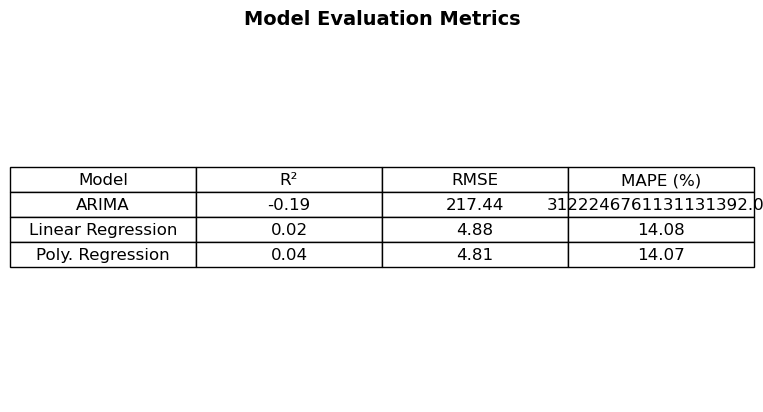

In [64]:
data = [
    ["ARIMA", f"{r2_arima:.2f}", f"{rmse_arima:.2f}", f"{mape_arima:.2f}"],
    ["Linear Regression", f"{r2_linear:.2f}", f"{rmse_linear:.2f}", f"{mape_linear:.2f}"],
    ["Poly. Regression", f"{r2_poly:.2f}", f"{rmse_poly:.2f}", f"{mape_poly:.2f}"]
]
columns = ["Model", "R²", "RMSE", "MAPE (%)"]

fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=data, colLabels=columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)
plt.title("Model Evaluation Metrics", fontsize=14, weight='bold')
plt.show()